In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

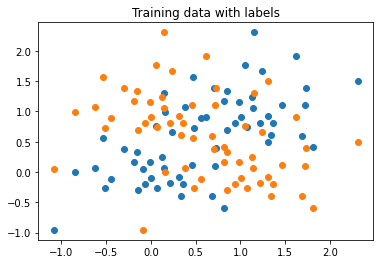

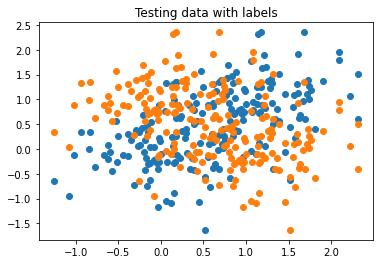

In [4]:
##############################################
## Generating 4 data points which will lie at the corners of a square
## They are all multi-variate gaussian distributed
##############################################
mean1=[0,0]
mean2=[0,1]
mean3=[1,0]
mean4=[1,1]
numOfSamplesForClass = 30
intialClasses = 4
changedClasses = 2

#Covariance matrix for bi-variate gaussian
#covairances are taken to be spherical, and the matrix is positiv semi-definite
cov = 0.3*np.eye(2)

#getting a bivariate normal distribution 
#mean - Expectation or center point of the bi-variate gaussian
#datapints - number of points to be generated
def getBiVarNormalDist ( mean, cov, dataPoints):
    np.random.seed(10)
    dist = np.random.multivariate_normal(mean, cov, dataPoints)
    return dist


#Preparing four gaussian distributions such that mean of the 4 distrubutions
#lie at the corners the square
#
def get4GaussianDist ( mean1, mean2, mean3, mean4, cov, numOfSamplesForClass ):
    plt1 = getBiVarNormalDist(mean1, cov, numOfSamplesForClass)
    plt2 = getBiVarNormalDist(mean2, cov, numOfSamplesForClass)
    plt3 = getBiVarNormalDist(mean3, cov, numOfSamplesForClass)
    plt4 = getBiVarNormalDist(mean4, cov, numOfSamplesForClass)
    return plt1, plt2,plt3,plt4
plt1, plt2,plt3,plt4 = get4GaussianDist ( mean1, mean2, mean3, mean4, cov, numOfSamplesForClass )


#Method to label data here 2nd index in the array is used for the label
#totalNoOfSamples - Integer
#numOfLabels - Integer
#labelData - List of different samples
#labels - labels to be used wrt label data
def labelTheData ( totalNoOfSamples, numOfLabels, labelData, labels ):
    allData = np.concatenate((labelData[0],labelData[1]),axis=0)
    labelVector = np.ndarray(0)
    samplesPerClass = int(totalNoOfSamples / 2)
    for i in range(numOfLabels):
        labelVector = np.concatenate( (labelVector,(labels[i] * (np.ones(samplesPerClass)))),axis=0 )
    labelVector = labelVector.T
    labelledData = np.insert ( allData,2,labelVector, axis=1)
    return labelledData

#Preparing training, testing data sets
#opposite corners of the square are taken as a class
def prepareTrainData (  mean1, mean2, mean3, mean4, cov, numOfSamplesForClass ):
    changedClasses = 2
    #allData = np.zeros((numOfSamplesForClass*intialClasses,3))
    plt1, plt2,plt3,plt4 = get4GaussianDist ( mean1, mean2, mean3, mean4, cov, numOfSamplesForClass )
    i = 0
    labels = [1,-1]
    label1TrainData =  np.concatenate((plt1,plt4),axis=0)
    label2TrainData =  np.concatenate((plt2,plt3),axis=0)
    #X Train is all the samples in train data
    X_train = np.concatenate((label1TrainData,label2TrainData), axis=0)
    Y_train = np.concatenate( ( ( 1 * (np.ones(changedClasses*numOfSamplesForClass))),
                                (-1 * (np.ones(changedClasses*numOfSamplesForClass)))),axis=0 )
    labelledTrainData = labelTheData ( numOfSamplesForClass*4, changedClasses, 
                                       [label1TrainData, label2TrainData], labels )
    return X_train, Y_train, labelledTrainData, label1TrainData, label2TrainData


X_train, Y_train, labelledTrainData, label1TrainData, label2TrainData = prepareTrainData ( mean1, mean2, mean3, mean4, cov, numOfSamplesForClass )



##Generateing label1 and lable2 data
##
numOfSamplesForClass = 100
label1TestData = np.concatenate( ( getBiVarNormalDist( mean1, cov, numOfSamplesForClass ), 
                                   getBiVarNormalDist( mean4, cov, numOfSamplesForClass ) ) )
label2TestData = np.concatenate( ( getBiVarNormalDist( mean2, cov, numOfSamplesForClass ), 
                                   getBiVarNormalDist( mean3, cov, numOfSamplesForClass ) ) )
X_test = np.concatenate((label1TestData, label2TestData),axis=0)
Y_test = np.concatenate ((np.ones(200), -1*np.ones(200)), axis=0)
labelledTestData = labelTheData ( len(X_test), 2, [label1TestData, label2TestData], [1,-1])

#Visualising training data
plt.title ("Training data with labels")
plt.scatter(label1TrainData[0:,0], label1TrainData[0:,1])
plt.scatter(label2TrainData[0:,0], label2TrainData[0:,1])
plt.show()

plt.title ("Testing data with labels")
plt.scatter(label1TestData[0:,0], label1TestData[0:,1])
plt.scatter(label2TestData[0:,0], label2TestData[0:,1])
plt.show()
#Visualising testing data

Accuracy = 72.25
True


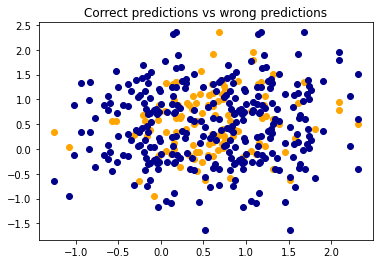

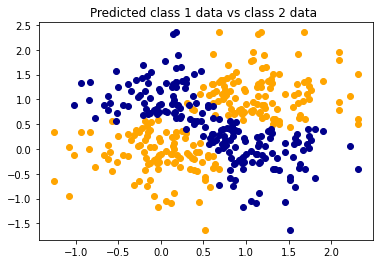

In [5]:

# findDistantaces : Finds Euclidain distances from each data point in the sample
# Inputs:
# dataPoint - single test data point
# trainData - training data points from which distances are calculated
# output:
#      - list of dictionaries {"distance":<int>, "label":<int>}
def findDistantaces ( dataPoint, trainData, labels ):
    dupDictx = {"distance":0, "label":0}
    allDistances = []
    for point, label in zip(trainData,labels):
        pointX = point[0]
        pointY = point[1]
        distance = math.sqrt(((pointY-dataPoint[1])**2 + (pointX-dataPoint[0])**2))
        dict1 = dupDictx.copy()
        dict1["label"] = label
        dict1["distance"] = distance
        allDistances.append(dict1)
    return allDistances

# sortDataBasedOnDistances : Sorts list of dictionaries {"distance":<int>, "label":<int>} in ascending order
# Input:
#       - allDistances - List of dicts
# output:
#      - sorted list of dicts
def sortDataBasedOnDistances ( allDistances ):
    allDistances.sort(key= lambda i : i["distance"])
    return allDistances

# findMaxAppearingLabel :  Finds most appeared label in kNN
# Inputs : 
#        - kNearestNeighbours, list of dicts {"distance":<int>, "label":<int>}
# Output:
#         - label for the data point
def findMaxAppearingLabel ( kNearestNeighbours ):
    label1Count = len( [i for i in  kNearestNeighbours if i['label'] == 1])
    label2Count = len([ i for i in  kNearestNeighbours if i['label'] == -1])
    #print(label1Count,label2Count)
    if (  label1Count > label2Count ):
        label = 1
    elif( label1Count < label2Count ):
        label = -1
    else:
        #tie condition
        label = random.choice([-1,1])
    return label

#fucntion to classify testing data based on the train data
def kNNClassify(X_train,Y_train,X_test,k):
    #initailising labels
    Y_pred = np.zeros(len(X_test))
    i = 0
    for dataPoint in X_test:
        allDistances = findDistantaces ( dataPoint, X_train, Y_train )
        sortedDistances = sortDataBasedOnDistances ( allDistances )
        kNearestNeighbours = sortedDistances[0:k]
        #print(len(kNearestNeighbours ))
        label = findMaxAppearingLabel ( kNearestNeighbours )
        Y_pred[i] = label
        i = i+1
    return Y_pred

k = 13
y_pred = kNNClassify (X_train,Y_train, X_test, k)


#Funciton to evaluate KNN accuracy
def KNNAccuracy(true,pred):
    correct = 0
    if len(true) != len(pred):
        print("Length of predicted values and true values are not equal")
        return -1
    for trueC, predC in zip(true,pred):
        if trueC == predC: 
            correct = correct + 1
    
    accuracy = (correct / len(true)) * 100
    return accuracy
    
accuracy1 = KNNAccuracy ( Y_test, y_pred )
print(f"Accuracy = {accuracy1}")

#finding points which are wrongly labelled
wrongPred = np.ndarray((0,2))
correctPred = np.ndarray((0,2))

for trueC, predC, testDataPoint in zip(Y_test,y_pred,X_test):
    testDataPoint.reshape((1,2))
    if trueC != predC:
        #using insert because, I kind of do not like vstack
        wrongPred = np.insert(wrongPred,len(wrongPred),testDataPoint,axis=0)
    else:
        correctPred = np.insert(correctPred,len(correctPred),testDataPoint,axis=0)
        
#just validatig if wrong pred and correct pred are segregated correcttly
print(((len(correctPred)/(len(wrongPred) + len (correctPred)))*100 == accuracy1 ) )

def seperateClass1Class2 ( y_pred, X_test):
    predClass1 = np.ndarray((0,2))
    predClass2 = np.ndarray((0,2))
    for predC, testDataPoint in zip(y_pred,X_test):
        testDataPoint.reshape((1,2))
        if predC == 1:
            predClass1 = np.insert(predClass1,len(predClass1),testDataPoint,axis=0)
        else:
            predClass2 = np.insert(predClass2,len(predClass2),testDataPoint,axis=0)
    return predClass1, predClass2

#plotting wrong vs correct predictions
plt.title("Correct predictions vs wrong predictions")
plt.scatter(wrongPred[0:,0], wrongPred[0:,1],color='orange')
plt.scatter(correctPred[0:,0], correctPred[0:,1],color='darkblue')
plt.show()

#Plotting predicte class 1 data vs predicted class2 data
predClass1, predClass2 = seperateClass1Class2 (  y_pred, X_test )
plt.title("Predicted class 1 data vs class 2 data ")
plt.scatter(predClass1[0:,0], predClass1[0:,1],color='orange')
plt.scatter(predClass2[0:,0], predClass2[0:,1],color='darkblue')
plt.show()


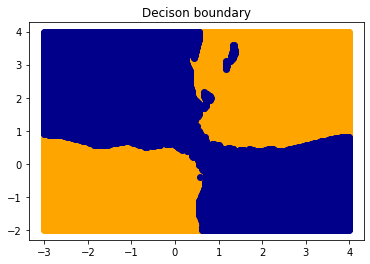

In [6]:
#Plotting decision boundary
#Decision boundary is plotted by classifying all the data points in the 2D space
def plotDecisionBoundary ( X_train, Y_train, k ):
    stepSize = .02
    #taking all points in the 2d space with help of mesh grid
    xx, yy = np.meshgrid(np.arange(-3, 4, stepSize),
                         np.arange(-2, 4, stepSize))
    #translating to our kNN input format
    xx = xx.T
    yy = yy.T
    xx = xx.reshape((1,xx.size))
    yy = yy.reshape((1,yy.size))
    zz = np.concatenate((xx,yy)).T
    #classifying all the points
    y_pred = kNNClassify (X_train,Y_train, zz, k)
    predClass1, predClass2 = seperateClass1Class2 ( y_pred, zz )
    #plotting to see teh decison boundary
    plt.title("Decison boundary")
    plt.scatter(predClass1[0:,0], predClass1[0:,1],color='orange')
    plt.scatter(predClass2[0:,0], predClass2[0:,1],color='darkblue')
    plt.show()
plotDecisionBoundary ( X_train, Y_train, k  )